<a href="https://colab.research.google.com/github/ROARMarketingConcepts/Data-Analysis-Projects/blob/master/Home_Credit_Default_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Home Credit Default Risk Analysis

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

**Home Credit Group**

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

### Analysis performed by:

Ken Wood

Marketing Data Scientist

ken@roarmarketingconcepts.com




---



### Mount the Google Drive where the dataset files are located...

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# !apt install proj-bin libproj-dev libgeos-dev

In [0]:
# !pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
# !sudo pip install -U git+https://github.com/matplotlib/basemap.git

### Install some necessary packages to perform the required analysis...

In [0]:
# !pip install -U scikit-learn
# !pip install --user --upgrade tables

import pandas as pd
import numpy as np
import sklearn
import scipy

import matplotlib.pyplot as plt
from matplotlib import interactive
plt.rc("font", size=14)
from pylab import scatter, show, legend, xlabel, ylabel

# from mpl_toolkits.basemap import Basemap

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [17]:
"""width = 28000000; lon_0 = -105; lat_0 = 40
m = Basemap(width=width,height=width,projection='aeqd',
            lat_0=lat_0,lon_0=lon_0)
# fill background.
m.drawmapboundary(fill_color='aqua')
# draw coasts and fill continents.
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='coral',lake_color='aqua')
# 20 degree graticule.
m.drawparallels(np.arange(-80,81,20))
m.drawmeridians(np.arange(-180,180,20))
# draw a black dot at the center.
xpt, ypt = m(lon_0, lat_0)
m.plot([xpt],[ypt],'ko')
# draw the title.
plt.title('Azimuthal Equidistant Projection')
plt.show()"""

"width = 28000000; lon_0 = -105; lat_0 = 40\nm = Basemap(width=width,height=width,projection='aeqd',\n            lat_0=lat_0,lon_0=lon_0)\n# fill background.\nm.drawmapboundary(fill_color='aqua')\n# draw coasts and fill continents.\nm.drawcoastlines(linewidth=0.5)\nm.fillcontinents(color='coral',lake_color='aqua')\n# 20 degree graticule.\nm.drawparallels(np.arange(-80,81,20))\nm.drawmeridians(np.arange(-180,180,20))\n# draw a black dot at the center.\nxpt, ypt = m(lon_0, lat_0)\nm.plot([xpt],[ypt],'ko')\n# draw the title.\nplt.title('Azimuthal Equidistant Projection')\nplt.show()"

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Let's list the datasets available to us...

In [8]:
import os

print('### Home Credit Default Risk Analysis ###\n')
for idx, file in enumerate(os.listdir('/gdrive/My Drive/Colab Notebooks/Home Credit Default Risk/files')):
    print(idx, '-', file)

### Home Credit Default Risk Analysis ###

0 - HomeCredit_columns_description.csv
1 - sample_submission.csv
2 - application_test.csv
3 - application_train.csv
4 - bureau_balance.csv
5 - bureau.csv
6 - credit_card_balance.csv
7 - installments_payments.csv
8 - POS_CASH_balance.csv
9 - previous_application.csv


### Load the datasets...

In [0]:
# column_description = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Home Credit Default Risk/files/HomeCredit_columns_description.csv')
application_train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Home Credit Default Risk/files/application_train.csv')
bureau_balance = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Home Credit Default Risk/files/bureau_balance.csv')
bureau = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Home Credit Default Risk/files/bureau.csv')
credit_card_balance = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Home Credit Default Risk/files/credit_card_balance.csv')
installments_payments = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Home Credit Default Risk/files/installments_payments.csv')
POS_CASH_balance = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Home Credit Default Risk/files/POS_CASH_balance.csv')
previous_application = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Home Credit Default Risk/files/previous_application.csv')

### Let's get some preliminary information about each of the datasets...

In [11]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [21]:
application_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [28]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [22]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [29]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [13]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [23]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [30]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [14]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF                    int64
dtypes: float64(15), int64(7

In [24]:
credit_card_balance.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [31]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [15]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
SK_ID_PREV                int64
SK_ID_CURR                int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER     int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [25]:
installments_payments.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [32]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [19]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               int64
SK_ID_CURR               int64
MONTHS_BALANCE           int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS     object
SK_DPD                   int64
SK_DPD_DEF               int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [26]:
POS_CASH_balance.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [33]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [20]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [27]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [34]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Let's convert all date fields to pandas 'datetime' variables so that we can easily work with dates and times in our analysis.

In [0]:
mql["first_contact_date"] = pd.to_datetime(mql["first_contact_date"],format = '%Y-%m-%d')
cd["won_date"] = pd.to_datetime(cd["won_date"],format = '%Y-%m-%d %H:%M:%S')
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"],format = '%Y-%m-%d %H:%M:%S')
order_reviews["review_creation_date"] = pd.to_datetime(order_reviews["review_creation_date"],format = '%Y-%m-%d %H:%M:%S')
order_reviews["review_answer_timestamp"] = pd.to_datetime(order_reviews["review_answer_timestamp"],format = '%Y-%m-%d %H:%M:%S')
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"],format = '%Y-%m-%d %H:%M:%S')
orders["order_approved_at"] = pd.to_datetime(orders["order_approved_at"],format = '%Y-%m-%d %H:%M:%S')
orders["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"],format = '%Y-%m-%d %H:%M:%S')
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"],format = '%Y-%m-%d %H:%M:%S')
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"],format = '%Y-%m-%d %H:%M:%S')

### Let's create the marketing funnel by left joining the 'mql' and 'cd' datasets. (Note that 'NaN's are leads that did not close.)

In [0]:
mf = mql.merge(cd, on='mql_id', how='left')
print("'mf' dimensions: {}".format(mf.shape))
mf.info()

'mf' dimensions: (8000, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 17 columns):
mql_id                           8000 non-null object
first_contact_date               8000 non-null datetime64[ns]
landing_page_id                  8000 non-null object
origin                           7940 non-null object
seller_id                        842 non-null object
sdr_id                           842 non-null object
sr_id                            842 non-null object
won_date                         842 non-null datetime64[ns]
business_segment                 841 non-null object
lead_type                        836 non-null object
lead_behaviour_profile           665 non-null object
has_company                      63 non-null object
has_gtin                         64 non-null object
average_stock                    66 non-null object
business_type                    832 non-null object
declared_product_catalog_size    69 non-null float64


In [0]:
"""for key,value in dict.items():
  print(color.BOLD+key+color.END,value.info(),'\n')""" # print dataset name in BOLD

"for key,value in dict.items():\n  print(color.BOLD+key+color.END,value.info(),'\n')"

### Now, we want to join information from the other datasets into the marketing funnel. Based on the schema diagram, 'order_items' should be the next dataset we merge.  Let's get some information about the 'order_items' dataset... We will merge it with the marketing funnel on the 'seller_id' column.

In [0]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
shipping_limit_date    112650 non-null datetime64[ns]
price                  112650 non-null float64
freight_value          112650 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [0]:
mf_items = mf.merge(order_items, how='left', on='seller_id')
mf_items['mql_id'].nunique()

8000

In [0]:
mf_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12664 entries, 0 to 12663
Data columns (total 23 columns):
mql_id                           12664 non-null object
first_contact_date               12664 non-null datetime64[ns]
landing_page_id                  12664 non-null object
origin                           12597 non-null object
seller_id                        5506 non-null object
sdr_id                           5506 non-null object
sr_id                            5506 non-null object
won_date                         5506 non-null datetime64[ns]
business_segment                 5505 non-null object
lead_type                        5455 non-null object
lead_behaviour_profile           3679 non-null object
has_company                      88 non-null object
has_gtin                         89 non-null object
average_stock                    91 non-null object
business_type                    5494 non-null object
declared_product_catalog_size    69 non-null float64
declared_month

### Let's take a look at the 'sellers' dataset...

In [0]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [0]:
sellers['seller_id'].nunique()

3095

### So we can conclude that the dataset has 3095 unique sellers.  Let's merge the seller information for each of the leads in the marketing funnel.

In [0]:
mf_sellers = mf.merge(sellers, how='left', on='seller_id')
mf_sellers['mql_id'].nunique()

8000

In [0]:
mf_sellers['seller_id'].nunique()

842

In [0]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
geolocation_zip_code_prefix    1000163 non-null int64
geolocation_lat                1000163 non-null float64
geolocation_lng                1000163 non-null float64
geolocation_city               1000163 non-null object
geolocation_state              1000163 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


###Now, in order to merge the 'geolocation' information into the marketing funnel on *zip_code_prefix*, we need to remove the duplicate values in 'geolocation' and then change the column names in both datasets.

In [0]:
geolocation['geolocation_zip_code_prefix'].value_counts()

24220    1146
24230    1102
38400     965
35500     907
11680     879
22631     832
30140     810
11740     788
38408     773
28970     743
36400     733
39400     724
37701     714
35162     713
35900     709
37200     696
88330     694
22790     687
35700     678
36570     667
38600     654
30575     652
20550     646
41830     641
29101     631
37550     621
29090     615
38610     614
24210     607
11250     602
         ... 
83760       1
55042       1
35593       1
49920       1
57604       1
70666       1
15905       1
31785       1
18216       1
78087       1
35133       1
33084       1
36666       1
55600       1
32553       1
40245       1
11555       1
36148       1
87567       1
70406       1
38455       1
18218       1
40241       1
45104       1
20776       1
73990       1
87307       1
72450       1
24877       1
38198       1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

In [0]:
geolocation = geolocation.drop_duplicates('geolocation_zip_code_prefix',keep='first')
geolocation['geolocation_zip_code_prefix'].value_counts()

2047     1
25241    1
19100    1
17053    1
68709    1
95190    1
15010    1
70800    1
2724     1
39590    1
4775     1
58025    1
64170    1
70054    1
88750    1
86703    1
78515    1
62107    1
27288    1
74475    1
37527    1
35460    1
83606    1
6790     1
4743     1
60040    1
25225    1
31370    1
29323    1
84620    1
        ..
13660    1
75102    1
11615    1
23905    1
78480    1
62820    1
25958    1
99690    1
3435     1
87408    1
38195    1
35400    1
21840    1
58338    1
75940    1
3387     1
48445    1
75070    1
87360    1
82590    1
17730    1
95556    1
9550     1
25926    1
27975    1
5448     1
40265    1
3403     1
79180    1
2049     1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

In [0]:
mf_sellers.rename(columns = {'seller_zip_code_prefix':'zip_code_prefix'},inplace=True)
geolocation.rename(columns = {'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### We verify that the correct columns have been renamed...

In [0]:
 # mf_sellers.info()

In [0]:
# geolocation.info()

In [0]:
mf_sellers = pd.merge(mf_sellers,geolocation[['zip_code_prefix','geolocation_lat','geolocation_lng']], how = 'left',on='zip_code_prefix')
mf_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 22 columns):
mql_id                           8000 non-null object
first_contact_date               8000 non-null datetime64[ns]
landing_page_id                  8000 non-null object
origin                           7940 non-null object
seller_id                        842 non-null object
sdr_id                           842 non-null object
sr_id                            842 non-null object
won_date                         842 non-null datetime64[ns]
business_segment                 841 non-null object
lead_type                        836 non-null object
lead_behaviour_profile           665 non-null object
has_company                      63 non-null object
has_gtin                         64 non-null object
average_stock                    66 non-null object
business_type                    832 non-null object
declared_product_catalog_size    69 non-null float64
declared_monthly_revenue    

In [0]:
mf_sellers.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,NaN,NaN,reseller,NaN,0.0,30421,belo horizonte,MG,-19.939689,-43.975338


### Let's take a look at the frequency of the unique values in each column of the 2 marketing funnels. For now, we will skip the id and date columns to keep our analysis clean.

## mf_items:

<class 'pandas.core.frame.DataFrame'>


### Data columns (total 23 columns):

mql_id                           12664 non-null object

first_contact_date               12664 non-null datetime64[ns]

landing_page_id                  12664 non-null object

origin                           12597 non-null object

seller_id                        5506 non-null object

sdr_id                           5506 non-null object

sr_id                            5506 non-null object

won_date                         5506 non-null datetime64[ns]

business_segment                 5505 non-null object

lead_type                        5455 non-null object

lead_behaviour_profile           3679 non-null object

has_company                      88 non-null object

has_gtin                         89 non-null object

average_stock                    91 non-null object

business_type                    5494 non-null object

declared_product_catalog_size    69 non-null float64

declared_monthly_revenue         5506 non-null float64

order_id                         5044 non-null object

order_item_id                    5044 non-null float64

product_id                       5044 non-null object

shipping_limit_date              5044 non-null datetime64[ns]

price                            5044 non-null float64

freight_value                    5044 non-null float64

dtypes: datetime64[ns](3), float64(5), object(15)

memory usage: 2.3+ MB

In [0]:
columns = ['origin','business_segment','lead_type','lead_behaviour_profile','has_company','has_gtin','average_stock',
           'business_type']

for col in columns:
    print(mf_items[col].value_counts(),'\n\n',mf_items[col].value_counts(normalize=True),'\n\n')
    

organic_search       3529
paid_search          2933
unknown              2390
social               1763
direct_traffic        686
email                 511
referral              352
other                 245
display               123
other_publicities      65
Name: origin, dtype: int64 

 organic_search       0.280146
paid_search          0.232833
unknown              0.189728
social               0.139954
direct_traffic       0.054457
email                0.040565
referral             0.027943
other                0.019449
display              0.009764
other_publicities    0.005160
Name: origin, dtype: float64 


health_beauty                      869
watches                            599
household_utilities                588
home_decor                         513
construction_tools_house_garden    355
audio_video_electronics            308
pet                                299
car_accessories                    211
bed_bath_table                     200
sports_leisure             

In [0]:
mf_items_origin = mf_items['origin'].value_counts(normalize=True).reset_index()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


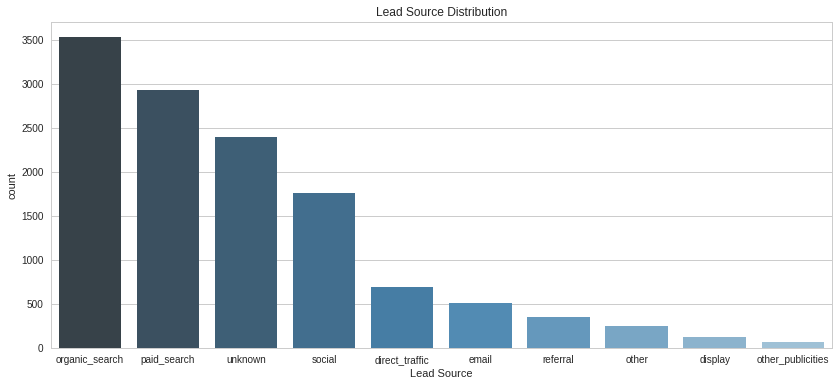

In [0]:
fig,ax = plt.subplots(figsize=(14,6))

order = []                        # Set up order for barchart
for row in mf_items_origin['index']:
  order.append(row)

sns.countplot(mf_items['origin'].sort_values(), order=order, palette="Blues_d")
ax.set_xlabel('Lead Source')
ax.set_title('Lead Source Distribution')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


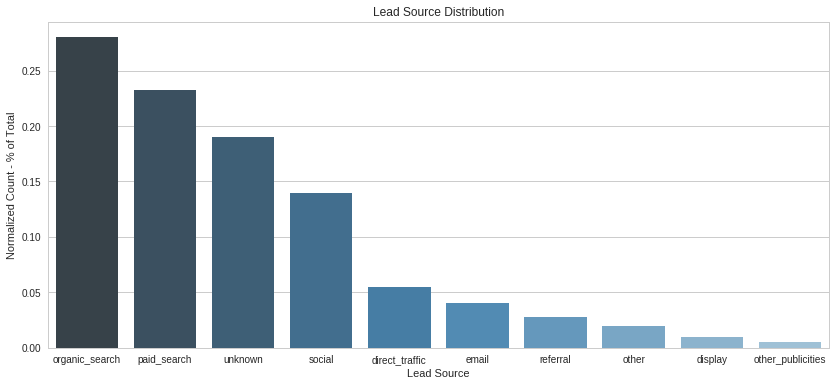

In [0]:
fig,ax = plt.subplots(figsize=(14,6))

order = []                        # Set up order for barchart
for row in mf_items_origin['index']:
  order.append(row)

sns.barplot(x ='index',y = 'origin', data = mf_items_origin, order=order, palette="Blues_d")
ax.set_xlabel('Lead Source')
ax.set_ylabel('Normalized Count - % of Total')
ax.set_title('Lead Source Distribution')

plt.show()

In [0]:
mf_items_business_segment = mf_items['business_segment'].value_counts(normalize=True).reset_index()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


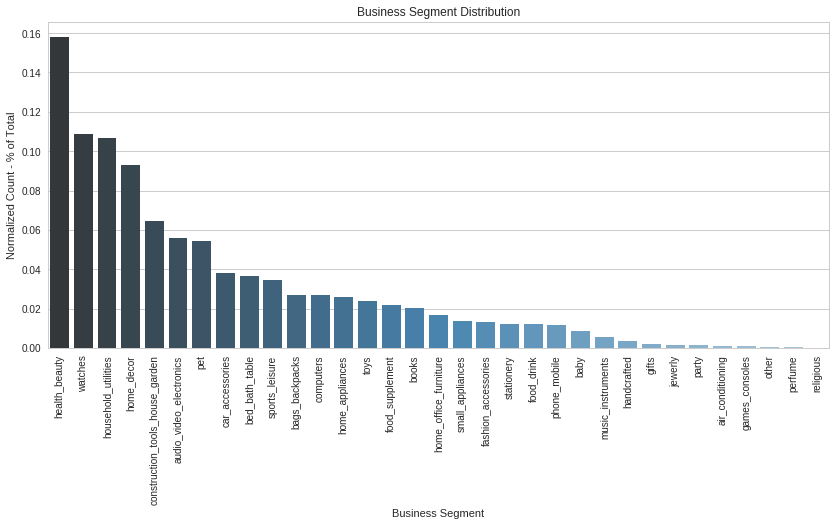

In [0]:
fig,ax = plt.subplots(figsize=(14,6))

order = []                        # Set up order for barchart
for row in mf_items_business_segment['index']:
  order.append(row)

graph = sns.barplot(x ='index',y = 'business_segment', data = mf_items_business_segment, order=order, palette="Blues_d")
ax.set_xlabel('Business Segment')
ax.set_ylabel('Normalized Count - % of Total')
ax.set_title('Business Segment Distribution')
graph.set_xticklabels(order,rotation=90)

plt.show()

In [0]:
mf_items_lead_type = mf_items['lead_type'].value_counts(normalize=True).reset_index()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


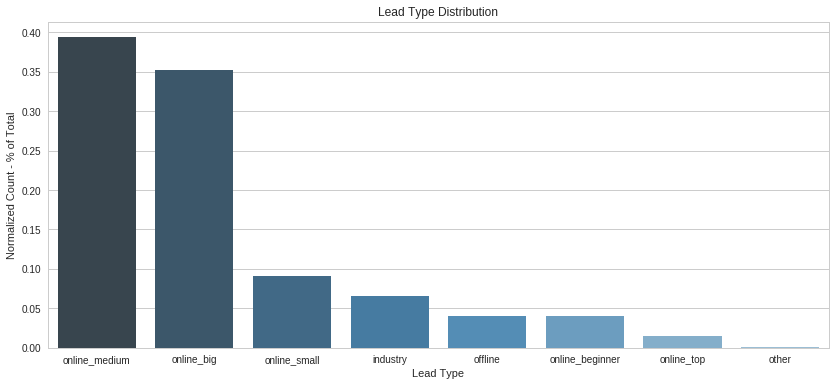

In [0]:
fig,ax = plt.subplots(figsize=(14,6))

order = []                        # Set up order for barchart
for row in mf_items_lead_type['index']:
  order.append(row)

graph = sns.barplot(x ='index',y ='lead_type', data = mf_items_lead_type, order=order, palette="Blues_d")
ax.set_xlabel('Lead Type')
ax.set_ylabel('Normalized Count - % of Total')
ax.set_title('Lead Type Distribution')
# graph.set_xticklabels(order,rotation=90)

plt.show()

In [0]:
mf_items_lead_behaviour_profile = mf_items['lead_behaviour_profile'].value_counts(normalize=True).reset_index()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


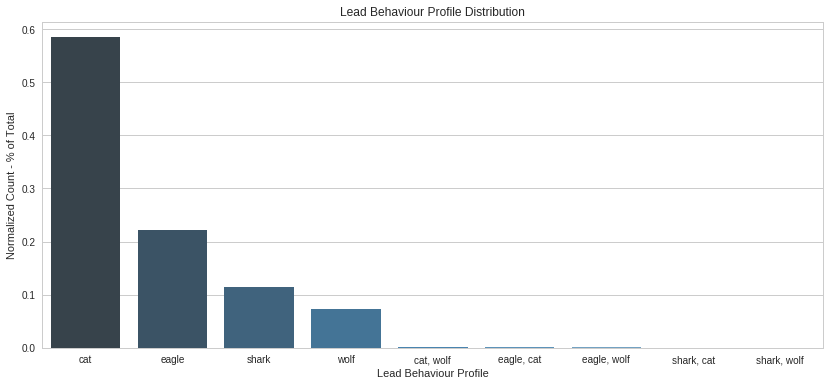

In [0]:
fig,ax = plt.subplots(figsize=(14,6))

order = []                        # Set up order for barchart
for row in mf_items_lead_behaviour_profile['index']:
  order.append(row)

graph = sns.barplot(x ='index',y ='lead_behaviour_profile', data = mf_items_lead_behaviour_profile, order=order, palette="Blues_d")
ax.set_xlabel('Lead Behaviour Profile')
ax.set_ylabel('Normalized Count - % of Total')
ax.set_title('Lead Behaviour Profile Distribution')
# graph.set_xticklabels(order,rotation=90)

plt.show()

In [0]:
mf_items_business_type = mf_items['business_type'].value_counts(normalize=True).reset_index()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


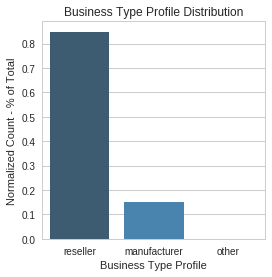

In [0]:
fig,ax = plt.subplots(figsize=(4,4))

order = []                        # Set up order for barchart
for row in mf_items_business_type['index']:
  order.append(row)

graph = sns.barplot(x ='index',y ='business_type', data = mf_items_business_type, order=order, palette="Blues_d")
ax.set_xlabel('Business Type Profile')
ax.set_ylabel('Normalized Count - % of Total')
ax.set_title('Business Type Profile Distribution')
# graph.set_xticklabels(order,rotation=90)

plt.show()

### Now, let's look at the 'mf_sellers' dataset.  We would like to get more information about where the sellers are located.  We can use the 'geolocation_lat' and 'geolocation_lng' fields and Python's 'Basemap' package to plot geographies.  We start with a basic Basemap plot of Earth.

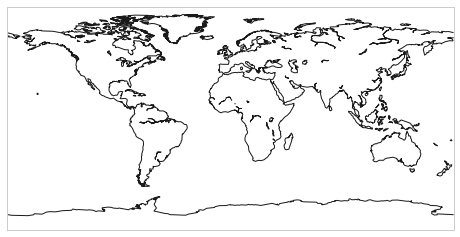

<Figure size 576x396 with 0 Axes>

In [0]:
map = Basemap()

map.drawcoastlines()

plt.show()
plt.savefig('test.png')

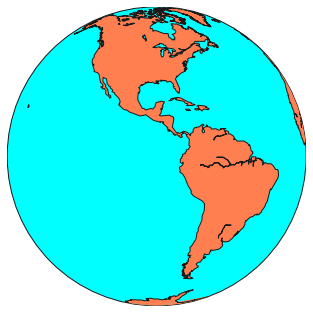

In [0]:
map = Basemap(projection='ortho', 
              lat_0=0, lon_0=-90)

#Fill the globe with a blue color 
map.drawmapboundary(fill_color='aqua')

#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')

map.drawcoastlines()

plt.show()

In [0]:
mf_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 22 columns):
mql_id                           8000 non-null object
first_contact_date               8000 non-null datetime64[ns]
landing_page_id                  8000 non-null object
origin                           7940 non-null object
seller_id                        842 non-null object
sdr_id                           842 non-null object
sr_id                            842 non-null object
won_date                         842 non-null datetime64[ns]
business_segment                 841 non-null object
lead_type                        836 non-null object
lead_behaviour_profile           665 non-null object
has_company                      63 non-null object
has_gtin                         64 non-null object
average_stock                    66 non-null object
business_type                    832 non-null object
declared_product_catalog_size    69 non-null float64
declared_monthly_revenue    

### Determine range to print based on min, max lat and long of the data

In [0]:
lat = np.asarray(mf_sellers['geolocation_lat'].dropna())
lng = np.asarray(mf_sellers['geolocation_lng'].dropna())

In [0]:
from geopy.geocoders import Nominatim

geolocator = Nominatim()

def PlotCity(city):
  loc1 = geolocator.geocode(city)
  x, y = map(loc1.longitude, loc1.latitude)
  ax.plot(x, y, 'ok', markersize=10)
  plt.text(x, y, city, fontsize=12,fontweight='bold')
  return
 

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


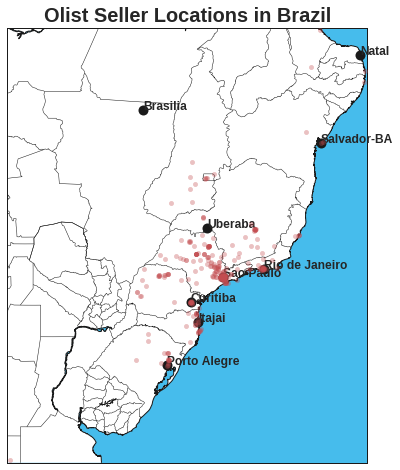

In [0]:
margin = .2                     # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lng_min = min(lng) - margin
lng_max = max(lng) + margin

# create map using BASEMAP
fig,ax = plt.subplots(figsize=(14,8))

map = Basemap(llcrnrlon=lng_min,
            llcrnrlat=lat_min,
            urcrnrlon=lng_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lng_max-lng_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.drawmapboundary(fill_color='#46bcec')
map.fillcontinents(color = 'white',lake_color='#46bcec')

# convert lat and long to map projection coordinates
x,y = map(lng, lat)

# plot points as red dots

map.scatter(x,y, marker = 'o', s=20,color='r',alpha=0.35, zorder=10)

# Find and plot major cities

city_list = ['Sao Paulo','Rio de Janeiro','Curitiba','Brasilia','Natal','Uberaba','Salvador-BA','Porto Alegre','Itajai']

for city in city_list:
  PlotCity(city)

plt.title("Olist Seller Locations in Brazil",fontsize=20,fontweight='bold')
plt.show()

### Let's look at characteristics of the closed deals...

In [0]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
mql_id                           842 non-null object
seller_id                        842 non-null object
sdr_id                           842 non-null object
sr_id                            842 non-null object
won_date                         842 non-null datetime64[ns]
business_segment                 841 non-null object
lead_type                        836 non-null object
lead_behaviour_profile           665 non-null object
has_company                      63 non-null object
has_gtin                         64 non-null object
average_stock                    66 non-null object
business_type                    832 non-null object
declared_product_catalog_size    69 non-null float64
declared_monthly_revenue         842 non-null float64
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 92.2+ KB


### If we merge 'cd' with 'order_items' we find out about sellers and items that associated with closed deals.

In [0]:
cd_items = cd.merge(order_items,how='left',on='seller_id')
print(cd_items['mql_id'].nunique())
cd_items.info()

842
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5506 entries, 0 to 5505
Data columns (total 20 columns):
mql_id                           5506 non-null object
seller_id                        5506 non-null object
sdr_id                           5506 non-null object
sr_id                            5506 non-null object
won_date                         5506 non-null datetime64[ns]
business_segment                 5505 non-null object
lead_type                        5455 non-null object
lead_behaviour_profile           3679 non-null object
has_company                      88 non-null object
has_gtin                         89 non-null object
average_stock                    91 non-null object
business_type                    5494 non-null object
declared_product_catalog_size    69 non-null float64
declared_monthly_revenue         5506 non-null float64
order_id                         5044 non-null object
order_item_id                    5044 non-null float64
product_id            

### Let's determine how many 'order_id's are associated with each closed deal 'mql_id'.  We'll also determine the revenue associated with each if these 'mql_id's.

In [0]:
order_ids_per_mql = cd_items.groupby(['mql_id'])['order_id'].count().reset_index()
order_ids_per_mql = order_ids_per_mql[order_ids_per_mql.order_id != 0]  # Delete rows where count(order_id) = 0
order_ids_per_mql.rename(columns = {'order_id':'num_order_ids'},inplace=True)
order_ids_per_mql.sort_values(by='num_order_ids',ascending=False)

,mql_id,num_order_ids
45,0b97be8b4b408a3a0780a32e0a143a7f,578
388,7b6ad2297d3beb569ddf3ee1ce22ffa8,338
166,327174d3648a2d047e8940d7d15204ca,110
185,384008daaa0f14b58912d8648101fdd0,106
825,fc4166d1b1e192f650ee2d807b54c943,98
477,98826328c3a60215e53b342560084571,91
547,ac029f072468dd8c97c15f0a9fa96f00,86
677,cfccca319397a5ea2bb11bd90b0d925d,86
740,e0bcbf50b9afa71ee130b94dfe8bcf2e,84
85,186f0892f13de5443c0b6d042a6ddde0,73


### Now we can merge the 'orders' and 'order_payments' and 'order_reviews' information for each 'order_id' in 'cd_items'. However, before we do that, let's add a column to the 'order_payments' dataset.

In [0]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### We will add a column called 'total_payment' which is the product of the 'payment_installments' and 'payment_value'.

In [0]:
order_payments['total_payment'] = order_payments['payment_installments']*order_payments['payment_value']

In [0]:
from functools import reduce

dfs_to_merge = [cd_items,orders,order_payments,order_reviews]
cd_order_info = reduce(lambda left,right: pd.merge(left,right,on=['order_id'],how='left'), dfs_to_merge)
cd_order_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5736 entries, 0 to 5735
Data columns (total 38 columns):
mql_id                           5736 non-null object
seller_id                        5736 non-null object
sdr_id                           5736 non-null object
sr_id                            5736 non-null object
won_date                         5736 non-null datetime64[ns]
business_segment                 5735 non-null object
lead_type                        5678 non-null object
lead_behaviour_profile           3831 non-null object
has_company                      88 non-null object
has_gtin                         89 non-null object
average_stock                    91 non-null object
business_type                    5724 non-null object
declared_product_catalog_size    69 non-null float64
declared_monthly_revenue         5736 non-null float64
order_id                         5274 non-null object
order_item_id                    5274 non-null float64
product_id                

### What is the revenue value for each closed deal 'mql_id'?

In [0]:
revenue_per_mql = cd_order_info.groupby(['mql_id'])['total_payment'].sum().reset_index()
revenue_per_mql = revenue_per_mql[revenue_per_mql.total_payment != 0]  # Delete rows where sum(total_payment) = 0
top_20_mqls= revenue_per_mql.sort_values(by='total_payment',ascending=False).head(20)
top_20_mqls

,mql_id,total_payment
45,0b97be8b4b408a3a0780a32e0a143a7f,610538.16
410,8257329475414b1eaf3dc731440e01a7,360241.89
388,7b6ad2297d3beb569ddf3ee1ce22ffa8,204366.75
389,7bf1f5c2051159d32a588de7a73c8edf,104336.34
422,860e39bc33e7c4ca4c26ec67979cc290,95184.77
423,862690c612c4c41a2ddceb9bf7a5c848,93854.72
166,327174d3648a2d047e8940d7d15204ca,93699.02
446,8d6be534a8bdd08e11efe57c6ce3dd21,85311.51
783,ee488918cd8d11b893067864f9dabddb,71131.05
9,02c1f06978b821b2996ec257932f2947,63713.70


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


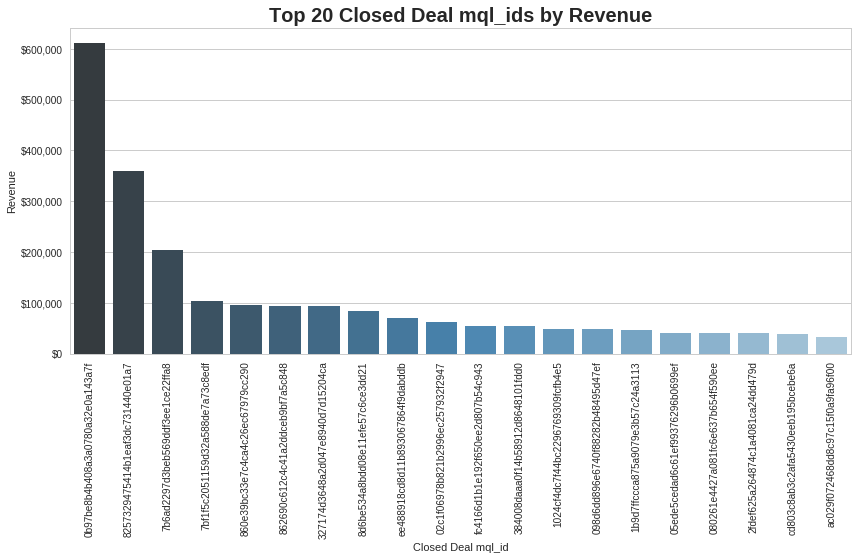

In [0]:
import matplotlib.ticker as mtick

fig,ax = plt.subplots(figsize=(14,6))

order = []                        # Set up order for barchart
for row in top_20_mqls['mql_id']:
  order.append(row)

graph = sns.barplot(x ='mql_id',y ='total_payment', data = top_20_mqls, order=order, palette="Blues_d")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.set_xlabel('Closed Deal mql_id')
ax.set_ylabel('Revenue')
ax.set_title('Top 20 Closed Deal mql_ids by Revenue',fontsize=20,fontweight='bold')
graph.set_xticklabels(order,rotation=90)

plt.show()

### Let's merge the customer information into the 'cd_items' dataset...

In [0]:
cd_order_customer_info = cd_order_info.merge(customers,how='left', on='customer_id')
cd_order_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5736 entries, 0 to 5735
Data columns (total 42 columns):
mql_id                           5736 non-null object
seller_id                        5736 non-null object
sdr_id                           5736 non-null object
sr_id                            5736 non-null object
won_date                         5736 non-null datetime64[ns]
business_segment                 5735 non-null object
lead_type                        5678 non-null object
lead_behaviour_profile           3831 non-null object
has_company                      88 non-null object
has_gtin                         89 non-null object
average_stock                    91 non-null object
business_type                    5724 non-null object
declared_product_catalog_size    69 non-null float64
declared_monthly_revenue         5736 non-null float64
order_id                         5274 non-null object
order_item_id                    5274 non-null float64
product_id                

### Let's merge the customer geographical location info into the 'cd_order_customer_info' dataset.

In [0]:
cd_order_customer_info.rename(columns = {'customer_zip_code_prefix':'zip_code_prefix'},inplace=True)
cd_order_customer_info = pd.merge(cd_order_customer_info,geolocation[['zip_code_prefix','geolocation_lat','geolocation_lng']], how = 'left',on='zip_code_prefix')
cd_order_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5736 entries, 0 to 5735
Data columns (total 44 columns):
mql_id                           5736 non-null object
seller_id                        5736 non-null object
sdr_id                           5736 non-null object
sr_id                            5736 non-null object
won_date                         5736 non-null datetime64[ns]
business_segment                 5735 non-null object
lead_type                        5678 non-null object
lead_behaviour_profile           3831 non-null object
has_company                      88 non-null object
has_gtin                         89 non-null object
average_stock                    91 non-null object
business_type                    5724 non-null object
declared_product_catalog_size    69 non-null float64
declared_monthly_revenue         5736 non-null float64
order_id                         5274 non-null object
order_item_id                    5274 non-null float64
product_id                

In [0]:
num_customers_per_cd_mql = cd_order_customer_info.groupby(['mql_id'])['customer_id'].count().reset_index()
num_customers_per_cd_mql = num_customers_per_cd_mql[num_customers_per_cd_mql.customer_id !=0]
num_customers_per_cd_mql.rename(columns = {'customer_id': 'num_customer_ids'},inplace=True)
num_customers_per_cd_mql

,mql_id,num_customer_ids
1,009ff90f082aaa9fcd6e14caf65c7cc6,6
6,014c073ef65e4a7ef73acd61cf606164,18
7,0173e8d8b1d94a355b440fb67388f532,1
8,01c629f6b8f2460aa362f29caaaa0a8e,2
9,02c1f06978b821b2996ec257932f2947,3
15,04921466d09d50f6541fdd33b322c876,1
16,04ecc73f538bcc74df709fe9281e08b8,12
17,04f8b803895d585e29bf21162e49cc84,1
18,051cb0d72dcd23f16842e894f5c46051,5
20,05b99715f32c973f929cd22735389966,2


In [0]:
num_products_per_cd_mql = cd_order_customer_info.groupby(['mql_id'])['product_id'].count().reset_index()
num_products_per_cd_mql = num_products_per_cd_mql[num_products_per_cd_mql.product_id !=0]
num_products_per_cd_mql.rename(columns = {'product_id': 'num_product_ids'},inplace=True)
num_products_per_cd_mql

,mql_id,num_product_ids
1,009ff90f082aaa9fcd6e14caf65c7cc6,6
6,014c073ef65e4a7ef73acd61cf606164,18
7,0173e8d8b1d94a355b440fb67388f532,1
8,01c629f6b8f2460aa362f29caaaa0a8e,2
9,02c1f06978b821b2996ec257932f2947,3
15,04921466d09d50f6541fdd33b322c876,1
16,04ecc73f538bcc74df709fe9281e08b8,12
17,04f8b803895d585e29bf21162e49cc84,1
18,051cb0d72dcd23f16842e894f5c46051,5
20,05b99715f32c973f929cd22735389966,2


### Let's plot the customer locations for the closed deal 'mql_id's...

In [0]:
lat = np.asarray(cd_order_customer_info['geolocation_lat'].dropna())
lng = np.asarray(cd_order_customer_info['geolocation_lng'].dropna())

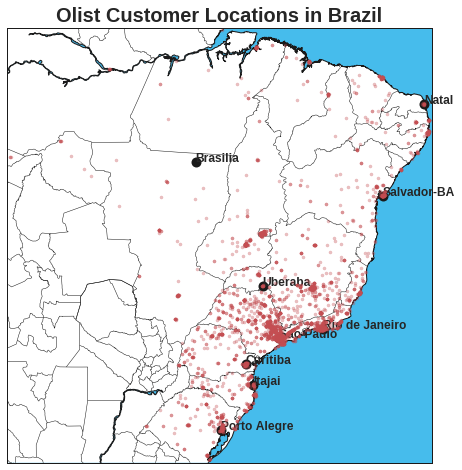

In [0]:
margin = .2                     # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lng_min = min(lng) - margin
lng_max = max(lng) + margin

# create map using BASEMAP
fig,ax = plt.subplots(figsize=(14,8))

map = Basemap(llcrnrlon=lng_min,
            llcrnrlat=lat_min,
            urcrnrlon=lng_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lng_max-lng_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.drawmapboundary(fill_color='#46bcec')
map.fillcontinents(color = 'white',lake_color='#46bcec')

# convert lat and long to map projection coordinates
x,y = map(lng, lat)

# plot points as red dots

map.scatter(x,y, marker = 'o',s = 10, color='r',alpha=0.35, zorder=10)

# Find and plot major cities

city_list = ['Sao Paulo','Rio de Janeiro','Curitiba','Brasilia','Natal','Uberaba','Salvador-BA','Porto Alegre','Itajai']

for city in city_list:
  PlotCity(city)

plt.title("Olist Customer Locations in Brazil",fontsize=20,fontweight='bold')
plt.show()

### Let's get the first contact date for each of the closed deal mql_id's.  We can get that from the 'mql' dataset.

In [0]:
cd_order_customer_info = cd_order_info.merge(mql[['mql_id','first_contact_date']],how='inner', on='mql_id')
cd_order_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5736 entries, 0 to 5735
Data columns (total 39 columns):
mql_id                           5736 non-null object
seller_id                        5736 non-null object
sdr_id                           5736 non-null object
sr_id                            5736 non-null object
won_date                         5736 non-null datetime64[ns]
business_segment                 5735 non-null object
lead_type                        5678 non-null object
lead_behaviour_profile           3831 non-null object
has_company                      88 non-null object
has_gtin                         89 non-null object
average_stock                    91 non-null object
business_type                    5724 non-null object
declared_product_catalog_size    69 non-null float64
declared_monthly_revenue         5736 non-null float64
order_id                         5274 non-null object
order_item_id                    5274 non-null float64
product_id                

In [0]:
cd_order_customer_info['lead_conversion_time'] = cd_order_customer_info['won_date'] - cd_order_customer_info['first_contact_date']
cd_order_customer_info['lead_conversion_time'] = cd_order_customer_info['lead_conversion_time'].dt.days  # Strip out days from timedelta variable
cd_order_customer_info['lead_conversion_time'] = cd_order_customer_info['lead_conversion_time'].apply(np.float32)
cd_order_customer_info['lead_conversion_time'].head()

0     5.0
1     5.0
2     5.0
3    34.0
4    63.0
Name: lead_conversion_time, dtype: float64

### Some statistics on the lead conversion times (measured in days) for the closed deals...  Notice that the standard deviation is higher than the mean value!  Let's see how closed deal revenue affects the lead conversion time.

In [0]:
cd_order_customer_info['lead_conversion_time'].describe()

count    5736.000000
mean       24.882148
std        46.065195
min        -2.000000
25%         4.000000
50%        11.000000
75%        23.000000
max       427.000000
Name: lead_conversion_time, dtype: float64

In [0]:
cd_order_customer_info.sort_values(by ='lead_conversion_time',ascending=False).head(50)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,...,payment_value,total_payment,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,first_contact_date,lead_conversion_time
4998,33ce1e734d9d50629fa2c36769285d53,53be10ff134691e94a4089b41c75874f,2b63542749aa9caf15f21816da1db341,d3d1e91a157ea7f90548eef82f1955e3,2018-09-11 13:14:37,construction_tools_house_garden,online_small,wolf,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2017-07-11,427.0
3402,c5b432382d5978b94676426a32725dff,3cbdc3237aa8afe44324bda4a1ccf676,b34f6eba10f46bf9a657a01c108a8284,a8387c01a09e99ce014107505b92388c,2018-10-03 18:32:49,car_accessories,offline,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2017-09-25,373.0
4435,b39ac02ff5021fed10cb9988a23d5d02,7c7d0dee362960b1d9b01fe7284e19ba,6aa3b86a83d784b05f0e37e26b20860d,56bf83c4bb35763a51c2baab501b4c67,2018-08-23 21:56:01,home_decor,online_small,shark,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2017-08-17,371.0
1843,e2e57ded5b59a2058dd5855564c6b5ea,160851d3ece7aa1a510f8d1a4bb8a8af,b90f87164b5f8c2cfa5c8572834dbe3f,4b339f9567d060bcea4f5136b9f5949e,2018-07-18 20:24:28,construction_tools_house_garden,industry,cat,True,True,...,66.42,66.42,0b38756f91a80ff9adfc00818d218555,5.0,NaN,NaN,2018-08-03,2018-08-04 20:03:36,2017-07-14,369.0
1844,e2e57ded5b59a2058dd5855564c6b5ea,160851d3ece7aa1a510f8d1a4bb8a8af,b90f87164b5f8c2cfa5c8572834dbe3f,4b339f9567d060bcea4f5136b9f5949e,2018-07-18 20:24:28,construction_tools_house_garden,industry,cat,True,True,...,74.73,74.73,acb3d458d50c812a27e550808e3ecfb2,5.0,NaN,NaN,2018-08-28,2018-09-05 21:19:58,2017-07-14,369.0
5404,a57bf18e19b6b17e3d4fbc20561e2055,2a17b229ca84523393b003b7e0bfae63,f42a2bd194f7802ab052a815c8de65b7,9d12ef1a7eca3ec58c545c678af7869c,2018-08-20 14:41:13,toys,online_small,"eagle, cat",True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2017-09-01,353.0
4576,d79c868179307f1cf78d0a12c56e2bf9,25ca84afdd32ede184dba55631c55274,e7dff61b78bebffa71678e126ce669ad,068066e24f0c643eb1d089c7dd20cd73,2018-08-30 12:32:15,computers,online_big,"shark, wolf",True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2017-09-23,341.0
5202,680fd12be44eee12aee2a2e023438a5d,535bf14f36346c7f59d87cece104d70c,45749fb708130f78d0db07d8d80f030b,9d12ef1a7eca3ec58c545c678af7869c,2018-08-07 12:21:06,home_decor,online_medium,wolf,True,False,...,57.77,57.77,e9b96935a6a2cdfbb0d73d58f147893b,4.0,boa,entregue no prazo,2018-08-24,2018-08-25 22:52:34,2017-08-31,341.0
3714,0383bd4aa37e8dd109be3864bc703eda,9fbe791853dbd2e3894d85162a8ff934,45749fb708130f78d0db07d8d80f030b,4b339f9567d060bcea4f5136b9f5949e,2018-10-02 21:25:39,car_accessories,online_medium,cat,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2017-10-26,341.0
1462,d768d7e09a6f9ff4146a1659635cf304,f233b575e585413f12fe2f847d922447,282f16e20d50cb18d05182e80f6b9dd6,d3d1e91a157ea7f90548eef82f1955e3,2018-10-30 18:21:05,household_utilities,online_big,wolf,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2017-11-24,340.0


In [0]:
revenue_per_mql = cd_order_customer_info.groupby(['mql_id','lead_conversion_time'])['total_payment'].sum().reset_index()
revenue_per_mql = revenue_per_mql[revenue_per_mql.total_payment != 0]  # Delete rows where sum('total_payment') = 0
cd_mqls_by_revenue = revenue_per_mql.sort_values(by='total_payment',ascending=False)
top_20_mqls= revenue_per_mql.sort_values(by='total_payment',ascending=False).head(20)

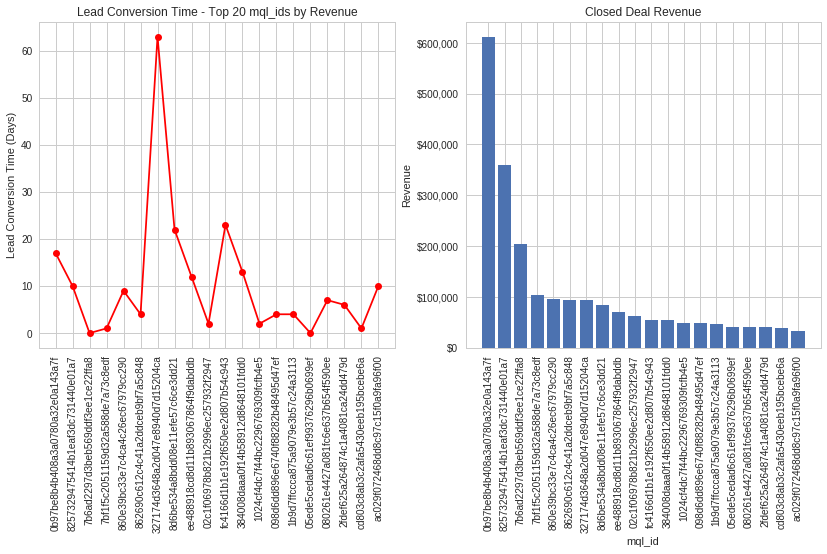

In [0]:

fig,ax = plt.subplots(figsize=(14,6))

x = top_20_mqls['mql_id']
y1 = top_20_mqls['lead_conversion_time']
y2 = top_20_mqls['total_payment']

plt.subplot(1,2,1)
plt.plot(x,y1, 'o-',color='red')
plt.title('Lead Conversion Time - Top 20 mql_ids by Revenue')
plt.ylabel('Lead Conversion Time (Days)')

plt.xticks(rotation=90)

ax2 = plt.subplot(1,2,2)
plt.bar(x, y2)
plt.title('Closed Deal Revenue')
plt.xlabel('mql_id')
plt.ylabel('Revenue')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax2.yaxis.set_major_formatter(tick) 

plt.xticks(rotation=90)

plt.show()

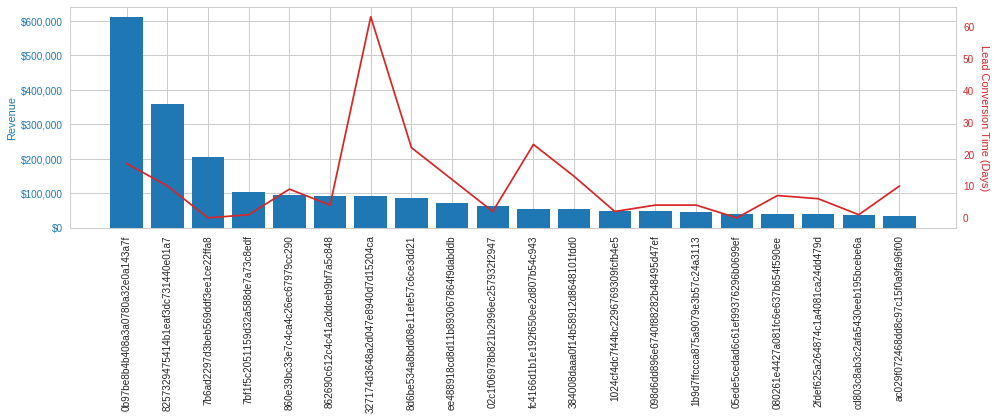

In [0]:
fig, ax1 = plt.subplots(figsize=(14,6))

color = 'tab:blue'
ax1.set_ylabel('Revenue', color=color)  # we already handled the x-label with ax1
ax1.bar(top_20_mqls['mql_id'], top_20_mqls['total_payment'], color=color)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 
ax1.tick_params(axis='y', labelcolor=color)

plt.xticks(rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_xlabel('mql_id')
ax2.set_ylabel('Lead Conversion Time (Days)', color=color, rotation=270,labelpad=15)
ax2.plot(top_20_mqls['mql_id'], top_20_mqls['lead_conversion_time'], color=color)
ax2.tick_params(axis='both', labelcolor=color)
ax2.grid(None)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### What kind of customer review scores did the top closed deals generate? We have a sorted list of the closed deal 'mql_id's according to revenue generated in 'cd_mqls_by_revenue'. We need to generate a list of 'order_id's for each 'mql_id'.

In [0]:
mean_review_score_per_mql = cd_order_customer_info.groupby(['mql_id'])['review_score'].mean().reset_index()
mean_review_score_per_mql.rename(columns = {'review_score':'mean_review_score'},inplace=True)
mean_review_score_per_mql.dropna(inplace=True)

In [0]:
cd_mqls_by_revenue = cd_mqls_by_revenue.merge(mean_review_score_per_mql,how='left',on='mql_id')
top_mql_mean_scores = cd_mqls_by_revenue.head(20)

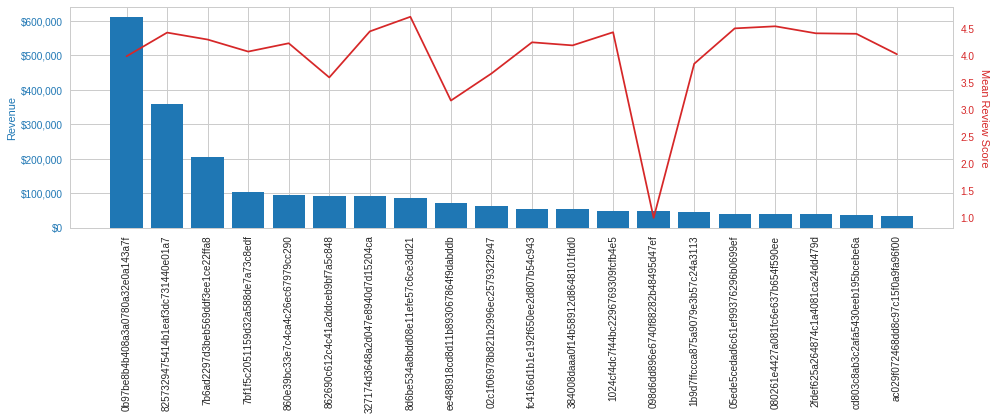

In [0]:
fig, ax1 = plt.subplots(figsize=(14,6))

color = 'tab:blue'
ax1.set_ylabel('Revenue', color=color)  # we already handled the x-label with ax1
ax1.bar(top_mql_mean_scores['mql_id'], top_mql_mean_scores['total_payment'], color=color)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 
ax1.tick_params(axis='y', labelcolor=color)

plt.xticks(rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_xlabel('mql_id')
ax2.set_ylabel('Mean Review Score', color=color, rotation=270,labelpad=15)
ax2.plot(top_mql_mean_scores['mql_id'], top_mql_mean_scores['mean_review_score'], color=color)
ax2.tick_params(axis='both', labelcolor=color)
ax2.grid(None)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Let's look at some other characteristics of the top closed deal 'mql_id's...

We'll look at:

*  Number of 'order_id's
*  Number of 'customer_id's
*  Number of 'product_id's






In [0]:
dfs_to_merge = [cd_mqls_by_revenue,order_ids_per_mql,num_customers_per_cd_mql,num_products_per_cd_mql]
cd_mql_by_revenue = reduce(lambda left,right: pd.merge(left,right,on=['mql_id'],how='left'), dfs_to_merge)
cd_mql_by_revenue

,mql_id,lead_conversion_time,total_payment,mean_review_score,num_order_ids,num_customer_ids,num_product_ids
0,0b97be8b4b408a3a0780a32e0a143a7f,17.0,610538.16,3.984950,578,598,598
1,8257329475414b1eaf3dc731440e01a7,10.0,360241.89,4.422222,38,45,45
2,7b6ad2297d3beb569ddf3ee1ce22ffa8,0.0,204366.75,4.293785,338,354,354
3,7bf1f5c2051159d32a588de7a73c8edf,1.0,104336.34,4.071429,13,14,14
4,860e39bc33e7c4ca4c26ec67979cc290,9.0,95184.77,4.225000,40,40,40
5,862690c612c4c41a2ddceb9bf7a5c848,4.0,93854.72,3.593750,30,32,32
6,327174d3648a2d047e8940d7d15204ca,63.0,93699.02,4.444444,110,117,117
7,8d6be534a8bdd08e11efe57c6ce3dd21,22.0,85311.51,4.714286,33,35,35
8,ee488918cd8d11b893067864f9dabddb,12.0,71131.05,3.166667,6,6,6
9,02c1f06978b821b2996ec257932f2947,2.0,63713.70,3.666667,3,3,3
